In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

1. `np.cov` uses the parameter `rowvar=0` to convert rows of samples into rows of variables to compute the covariance matrix.
2. `np.diag` obtains the diagonal, which is the variances from a covariance matrix.
3. `np.sqrt` will obtain the standard deviations of the diagonal.

In [4]:
X = np.array([[4.0, 2.0, 0.60],
              [4.2, 2.1, 0.59],
              [3.9, 2.0, 0.58],
              [4.3, 2.1, 0.62],
              [4.1, 2.2, 0.63]])

X_mean = np.mean(X, axis=0)
X_cov = np.cov(X, rowvar=0)
X_diag = np.diag(X_cov)
X_stddev = np.sqrt(X_diag)

print(X_mean)
print(X_cov)
print(X_diag)
print(X_stddev)

[4.1   2.08  0.604]
[[0.025   0.0075  0.00175]
 [0.0075  0.007   0.00135]
 [0.00175 0.00135 0.00043]]
[0.025   0.007   0.00043]
[0.15811388 0.083666   0.02073644]


1. `tfd.MultivariateNormalFullCovariance` will be deprecated and `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` should be used instead.

In [6]:
mvn = tfd.MultivariateNormalFullCovariance(
    loc=X_mean,
    covariance_matrix=X_cov)

mvn_mean = mvn.mean().numpy()
mvn_cov = mvn.covariance().numpy()
mvn_stddev = mvn.stddev().numpy()

print(mvn_mean)
print(mvn_cov)
print(mvn_stddev)

Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.
[4.1   2.08  0.604]
[[0.025   0.0075  0.00175]
 [0.0075  0.007   0.00135]
 [0.00175 0.00135 0.00043]]
[0.15811388 0.083666   0.02073644]


In [5]:
# Due to deprecated MultivariateNormalFullCovariance
mvn = tfd.MultivariateNormalTriL(
    loc=X_mean,
    scale_tril=tf.linalg.cholesky(X_cov))

mvn_mean = mvn.mean().numpy()
mvn_cov = mvn.covariance().numpy()
mvn_stddev = mvn.stddev().numpy()

print(mvn_mean)
print(mvn_cov)
print(mvn_stddev)

[4.1   2.08  0.604]
[[0.025   0.0075  0.00175]
 [0.0075  0.007   0.00135]
 [0.00175 0.00135 0.00043]]
[0.15811388 0.083666   0.02073644]


In [7]:
mvn = tfd.MultivariateNormalDiag(
    loc=X_mean,
    scale_diag=np.sqrt(X_diag))

mvn_mean = mvn.mean().numpy()
mvn_cov = mvn.covariance().numpy()
mvn_stddev = mvn.stddev().numpy()

print(mvn_mean)
print(mvn_cov)
print(mvn_stddev)

[4.1   2.08  0.604]
[[0.025   0.      0.     ]
 [0.      0.007   0.     ]
 [0.      0.      0.00043]]
[0.15811388 0.083666   0.02073644]


1. A categorical distribution `tfd.Categorical(probs=pi)` is a discrete probability distribution that models a random variable that takes 1 of K possible categories.

In [7]:
pi = np.array([0.2, 0.3, 0.5], dtype=np.float32)
mu = np.array([10, 20, 30], dtype=np.float32)
sigma = np.array([1, 2, 3], dtype=np.float32)

In [8]:
gmm = tfd.Mixture(
    cat=tfd.Categorical(probs=pi),
    components=[
        tfd.Normal(loc=mu[0], scale=sigma[0]),
        tfd.Normal(loc=mu[1], scale=sigma[1]),
        tfd.Normal(loc=mu[2], scale=sigma[2])
])

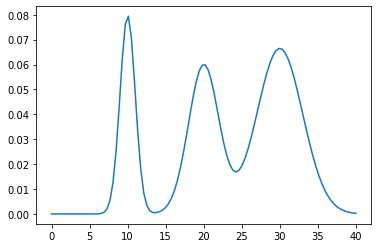

In [15]:
x = np.linspace(0, 40, 100)
plt.plot(x, gmm.prob(x).numpy());